In [704]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from collections import Counter
import re
import statistics
%matplotlib inline

tweets = pd.read_csv('russia_merged.csv')

# Exploration of Russian "Troll Factory" Twitter Accounts and Tweets

## Data 

   For my Capstone project I chose to explore a dataset of tweets from accounts that have been linked to Russia's Internet Research Agency, an organization that has been characterized as a state-sponsored "troll factory". The dataset I will examine is a collection of 2,973,371 tweets sent from 2,848 Twitter handles between 2012 and 2018. 

This dataset was assembled by news, opinion poll analysis, politics, economics, and sports blogging website, FiveThirtyEight from data obtained by Clemson University researchers  Darren Linvill  and Patrik Warren on July 25, 2018. These researchers gathered the data using custom searches on a tool called Social Studio, owned by Salesforce and contracted for use by Clemson's Social Media Listening Center. 

I chose this data  because of my interest in politics and due to the fact that information from this dataset is playing a role in Special Counsel Robert Mueller's investigation into Russian interference in the  2016 Election. In fact, this year, the US Justice Department filed criminal charges against 13 Russian Nationals who were employees of the Internet Research Agency. 

The dataset includes the Twitter author or Twitter handle, each tweets content, the region the tweet originated from, the tweets language, the publish date, the date the tweet was harvested, the number of accounts each handle is following (updated over time), the followers each account has(updated over time), number of account updates, post type, account type, retweets, and account categories. 


# Analtyic Questions

###  1. What is the makeup of the Russian troll accounts? Do the Authors tweet roughly the same amount, or are there accounts who tweet far more than others? What languages are they tweeting in? What percentage of the tweets belong to which Account Categories? What is percentage of Left-wing Troll accounts vs. Right-wing Troll accounts? 


The first question I want to answer is what can the data about the individual accounts tell me about the data as a whole.  Let’s start with the 'Authors', or Twitter handles. I want to know about HOW certain accounts post.  Do all the accounts put out the same amount of content or are there a few accounts that post substantially more than the rest?  

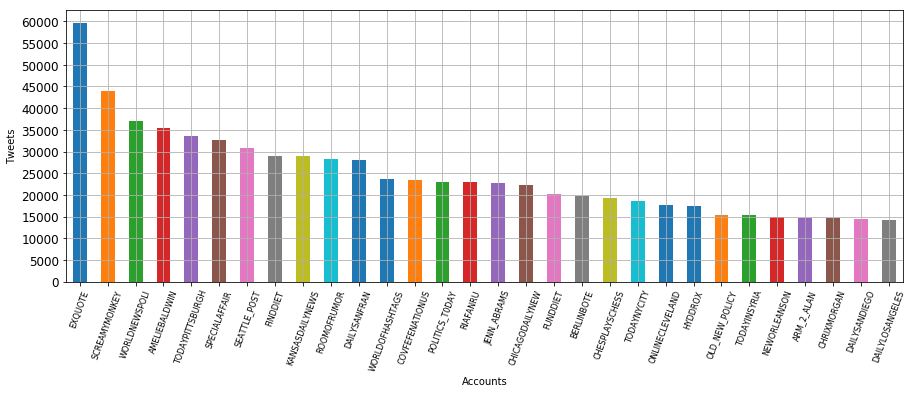

In [705]:
tweets.author.value_counts().head(30).plot(kind='bar', figsize=(15,5))
plt.xticks(fontsize=8, rotation= 70)
plt.yticks(np.arange(0, 61000, 5000), fontsize=12) 
plt.grid(True)
plt.xlabel('Accounts')
plt.ylabel('Tweets')
plt.show()

Looking at the "Authors" it is clear that "EXQUOTE" is the most prolific account with nearly 60,000 tweets, tweeting 15,000 more times than the next biggest tweeter. However, the tweet numbers of the other Top 30  Authors are also very high, which leads to believe that the vast majority of the tweets are coming from a handful of accounts. Let’s dive a little deeper to find out.

In [706]:
tweets.author.value_counts().describe()

count     2849.000000
mean      1043.657073
std       3156.244779
min          1.000000
25%         30.000000
50%        154.000000
75%        569.000000
max      59652.000000
Name: author, dtype: float64

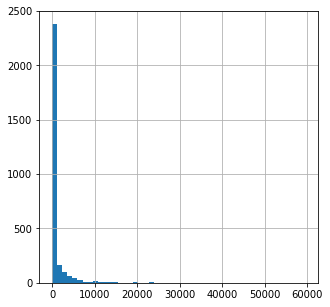

In [707]:
tweets.author.value_counts().hist(bins=50, figsize=(5,5))
plt.show()

Looking at the descriptive statistics of the tweets per Author and the distribution of tweets per Author, it's clear that most of the tweets are coming from a few accounts. We can see that the average number of tweets per Author is 983.81, and that 75% of the Authors have only tweeted between 1 and 221 times. 

The next thing I want to do is to make sure that there is a large enough sample size of data in English that I can work with. 

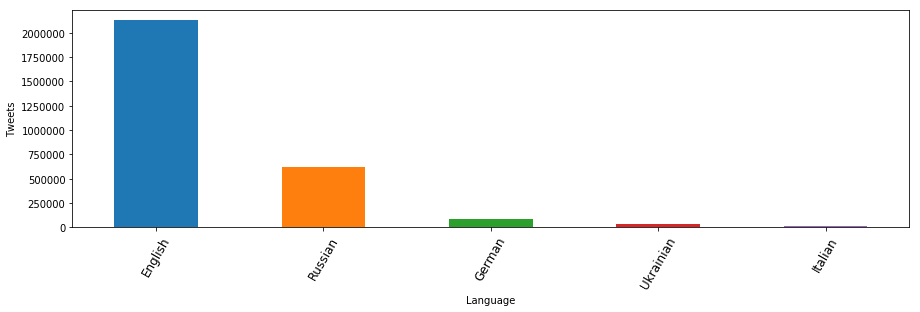

In [708]:
tweets.language.value_counts().head(5).plot(kind='bar', figsize=(15,4))
plt.xticks(fontsize=12, rotation=60)
plt.xlabel('Language')
plt.ylabel('Tweets')
plt.show()

I think 2 million tweets in English is more than enough. Next let's take a look at which "Account Category" these tweets belong to. But first, let's clean up the dataset and get rid of any erroneous data or data that I do not wish to examine any further in this study. We'll start by removing all of the non-English accounts and content. 

In [709]:
tweets = tweets.drop(columns=['external_author_id', 'region', 'harvested_date', 'updates', 'post_type', 
                              'new_june_2018'])
tweets = tweets[tweets.language == 'English']

In [710]:
tweets.account_category.value_counts()

RightTroll      712345
NewsFeed        597656
LeftTroll       422806
HashtagGamer    236132
Commercial      113256
NonEnglish       28465
Fearmonger       11001
Unknown           7302
Name: account_category, dtype: int64

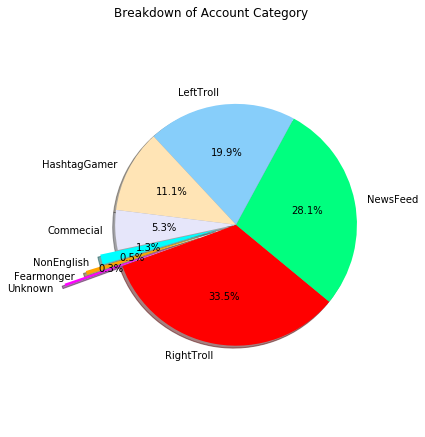

In [826]:
labels = ['RightTroll', 'NewsFeed', 'LeftTroll', 'HashtagGamer', 'Commecial', 'NonEnglish', 'Fearmonger', 'Unknown']
sizes = [712345, 597656, 422806, 236132, 113256, 28465, 11001, 7302]
colors = ['red', 'springgreen', 'lightskyblue', 'moccasin', 'lavender', 'cyan', 'orange', 'magenta']
explode = (0, 0, 0, 0, 0, 0.15, 0.3, 0.5)  
fig = plt.figure(figsize=[6, 6])

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=200)
 
plt.axis('equal')
plt.tight_layout()
plt.title('Breakdown of Account Category')
plt.show()

Breaking down the "Account Category" information, we can see that there are eight different Account Categories. The three largest categories by total number of tweets are ‘RightTroll’ (712345 tweets or 33.5%), for right-wing accounts, ‘NewsFeed’ (597656 tweets or 28.1%), for accounts that aggregate and post information on local news, and 'LeftTroll' (422806 tweets or 19.9%), for left-wing accounts. Interestingly enough, although we removed all tweets with content that was not English, there is still an Account Category called NonEnglish with content in it remaining. Hmmm? Well now let's look at just the ‘RightTroll’ and 'LeftTroll' Account Categories. 


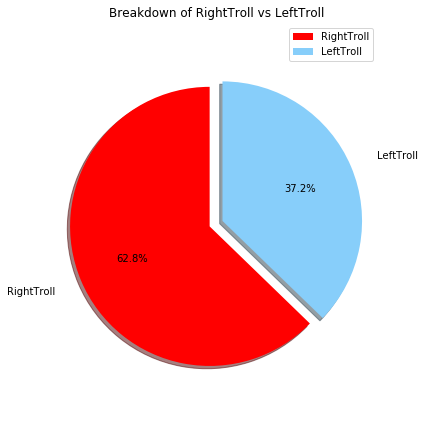

In [827]:
labels = 'RightTroll', 'LeftTroll'
sizes = [712345, 422806]
explode = (0, 0.1) 
colors = ['red', 'lightskyblue']
fig = plt.figure(figsize=[6, 6])

plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=1.2)

plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Breakdown of RightTroll vs LeftTroll')
plt.show()

Now that we have removed all of the non-English accounts and the accounts belonging to the other 6 Account Categories, We can see that of the Account Categories, the ‘RighTroll’ accounts are responsible for 62.8% of the tweets and the 'LeftTroll' accounts are responsible for the other 37.2%. 

### 2. What were the most common hashtags used by the LeftTroll and RightTroll accounts? Are there any common themes of RightTroll and LeftTroll hashtags?  Were there any outlier hashtags?


In this next section, we are going to examine the content of the 'LeftTroll' and ‘RightTroll’ accounts' tweets to see if there are any common themes in each Account Category. To do this, let's analyze the Hashtags used in each groups' tweets.


In [713]:
content_left_troll = tweets.loc[tweets['account_category'] == 'LeftTroll', ['content']]
content_right_troll = tweets.loc[tweets['account_category'] == 'RightTroll', ['content']]

clt = content_left_troll.content
crt = content_right_troll.content

In [714]:
    left_troll_hashtags = []
    stopwords_set = set(stopwords.words("english"))

    for row in clt:
        words_filtered = [e.lower() for e in row.split() if len(e) >= 3]
        words_cleaned = [word for word in words_filtered
            if word.startswith('#')
            and word != 'RT']
        words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
        left_troll_hashtags.append((words_without_stopwords))

In [715]:
    right_troll_hashtags = []
    stopwords_set = set(stopwords.words("english"))

    for row in crt:
        words_filtered = [e.lower() for e in row.split() if len(e) >= 3]
        words_cleaned = [word for word in words_filtered
            if word.startswith('#')
            and word != 'RT']
        words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
        right_troll_hashtags.append((words_without_stopwords))

In [716]:
left_troll_hashtag_list = [item for sublist in left_troll_hashtags for item in sublist]
right_troll_hashtag_list = [item for sublist in right_troll_hashtags for item in sublist]

left_hash50 = Counter(left_troll_hashtag_list).most_common(50)
right_hash50 = Counter(right_troll_hashtag_list).most_common(50)

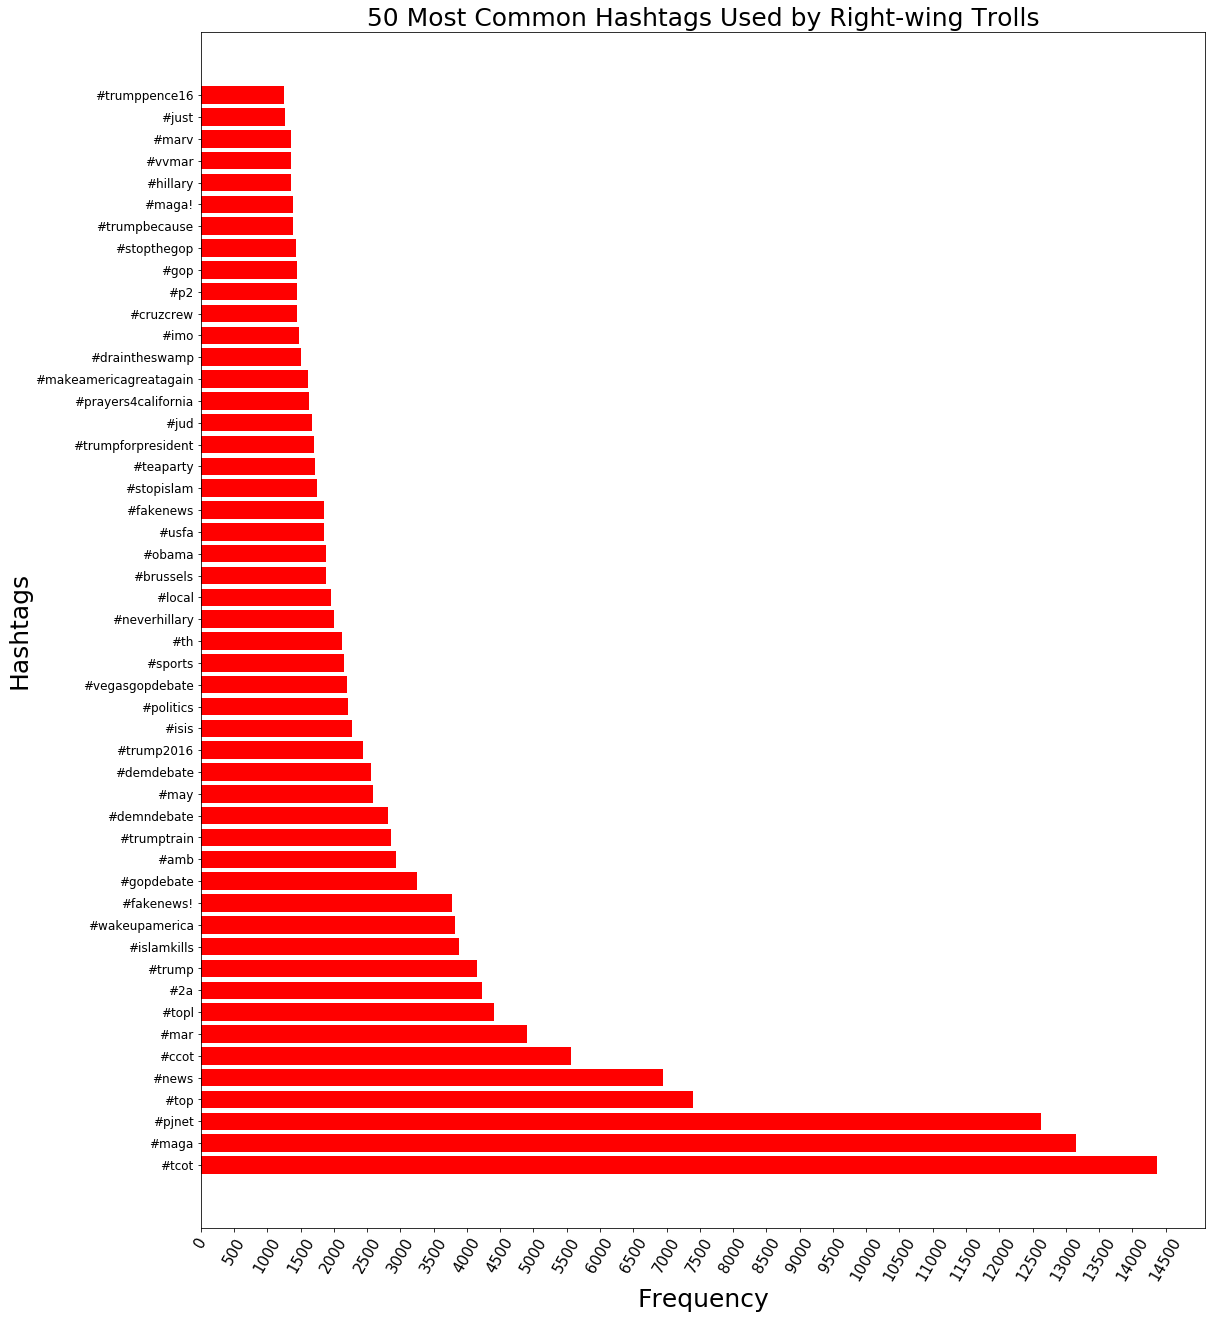

In [717]:
dhr = dict(right_hash50)

plt.figure(figsize=(18, 22))

X = np.arange(len(dhr))
plt.barh(X, list(dhr.values()), color='r', align='center')
plt.yticks(range(len(dhr)), list(dhr.keys()))
plt.xlabel('Frequency', fontsize=25) 
plt.ylabel('Hashtags', fontsize=25)
plt.xticks(np.arange(0, 14600, 500), rotation=60, fontsize=15)
plt.yticks(fontsize=12)
plt.title('50 Most Common Hashtags Used by Right-wing Trolls', fontsize=25)

plt.show()

Looking at the Top 50 Hashtags used in ‘RightTroll’ tweets, some common themes arise. The the most prominent theme, in terms of number of Top 50 Hashtags, is Donald Trump, with at least 12 of 50 Top Hashtags directly relating to Donald Trump(#Maga, #trump, #trumptrain, #trump2016, #neverhillary, #fakenews, #trumpforpresident, #makeamericagreatagain, #draintheswamp, #trumpbecause, #maga!, #trumppence16). 

While not surprising in terms of theme, but surprising to me becasue I had to Google all of these hashtags, were hashtags related to being a Conservative or a Christian Conservative (#tcot = top conservatives on Twitter, #pjnet = patriot journalism network, #ccot = christian conservatives on Twitter). Other themes in the Top 50 Hashtags include Islam, Islamic terrorism and Islamophobia (#islamkills, #isis, #stopislam, #brussels), and shootings and the second amendment(#2a, #prayer4california). 

Based on this information, these Twitter accounts could have  been attempting to appeal to or impersonate right-wing, Christian Conservatives who are also Trump supporters. Now let's see what the 'LeftTroll' hashtags can tells us!


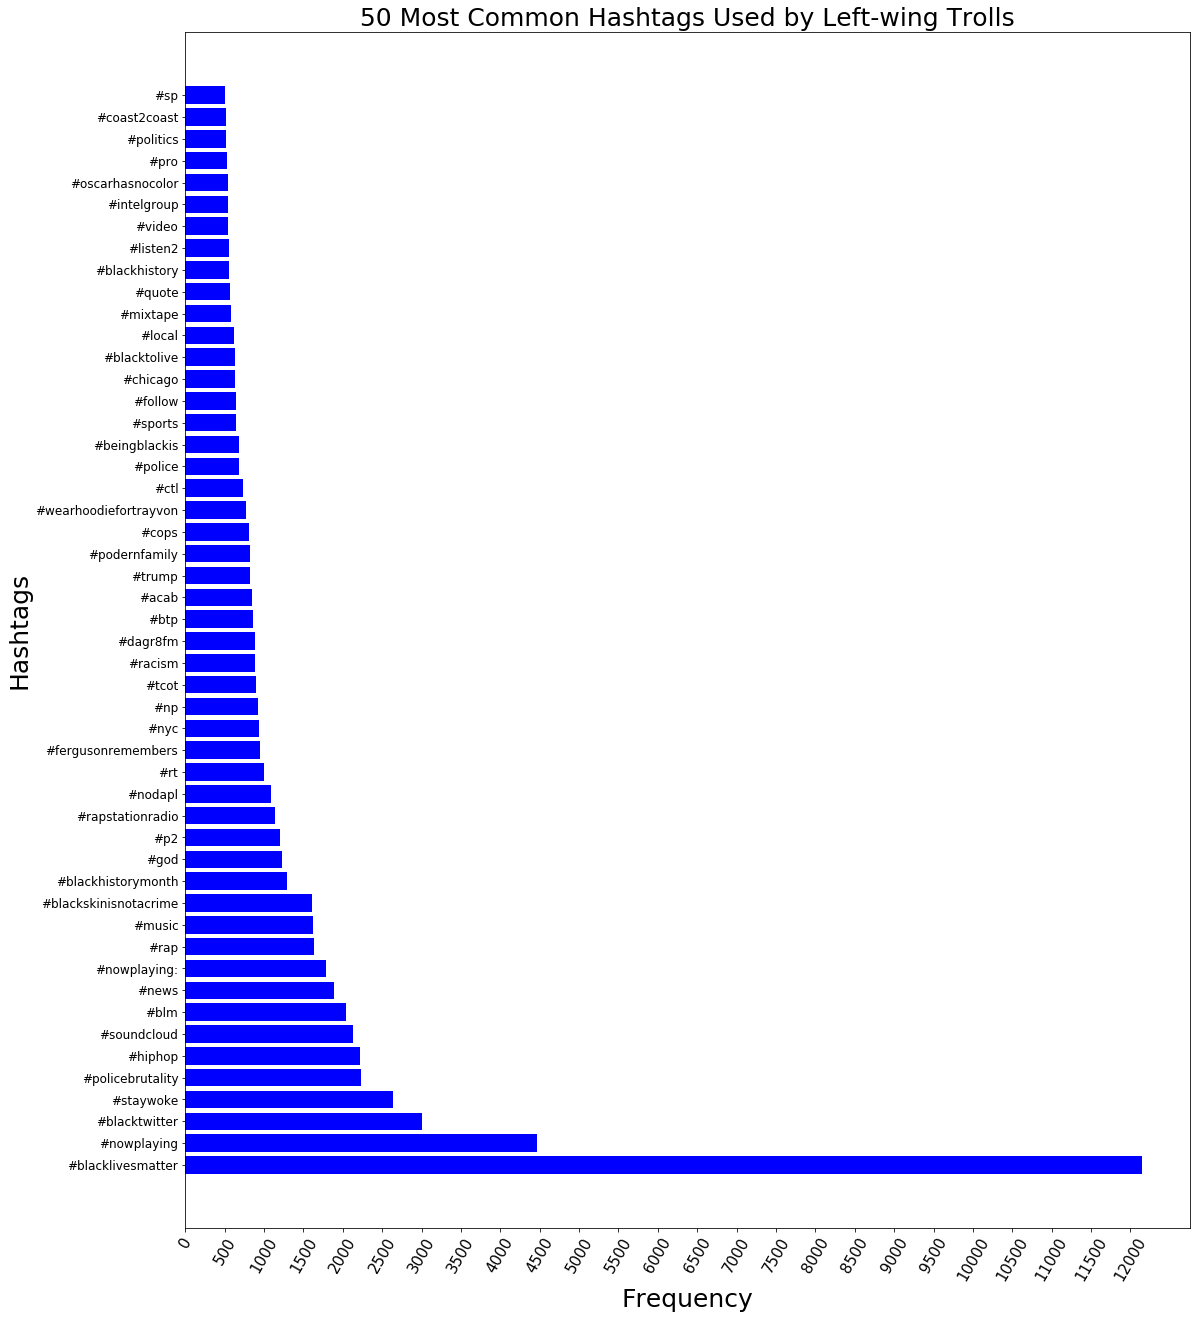

In [718]:
dhl = dict(left_hash50)

plt.figure(figsize=(18,22))

X = np.arange(len(dhl))
plt.barh(X, list(dhl.values()), color='b', align='center')
plt.yticks(range(len(dhl)), list(dhl.keys()))
plt.xlabel('Frequency', fontsize=25) 
plt.ylabel('Hashtags', fontsize=25)
plt.xticks(np.arange(0, 12500, 500), rotation=60, fontsize=15)
plt.yticks(fontsize=12)
plt.title('50 Most Common Hashtags Used by Left-wing Trolls', fontsize=25)

plt.show()

Examining the Top 50 Hashtags used in 'LeftTroll' tweets, #blacklivesmatter is the clear outlier, with almost three times the use as any other hashtag. When combined with #blm, an abbreviation for #blacklivesmatter, it is almost four times as common as the next most popular hashtag.

Many of the remaining Top 50 Hashtags relate to Black Lives Matters, such as racism, police brutality, and the killing of unarmed black men. There are also a number of hashtags related to rap, hip-hop, soundcloud, and hip-hop radio stations.

From my observations of the ‘LeftTroll’ Top 50 Hashtags, it appears that the 'LeftTroll' accounts could have been attempting to impersonate or appeal to black Twitter users particularly individuals supportive of the Black Lives Matter activist movement.




### 3. Are there dates when the Russian accounts tweeted far more than usual? If so, can you find events that can explain why there was so much more activity on those dates?

First, I will use a box plot to check if there were any instances where the Twitter accounts tweeted much more than normal. 

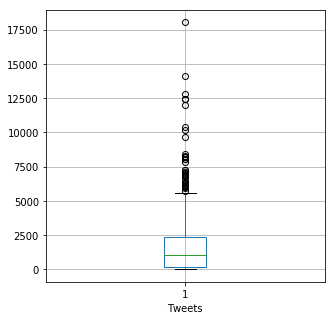

In [815]:
import datetime
import pandas as pd
tweets['publish_date'] = pd.to_datetime(tweets['publish_date'])
dates = tweets.publish_date.dt.normalize()
dates1 = dates.value_counts()
dates1 = dates1.sort_index()
times = Counter(dates).most_common()

df_times = pd.DataFrame(times)

plt.figure(figsize=(5,5))
df_times.boxplot()
plt.xlabel('Tweets')
plt.show()

As we can see, there were numerous instances of activity outside the normal range for tweets in a day. According to the box plot, there were 3 occasions when the accounts tweeted more than 12500 times in a day. Let’s look at another graph to try and find the days or periods when the accounts tweeted the most. 

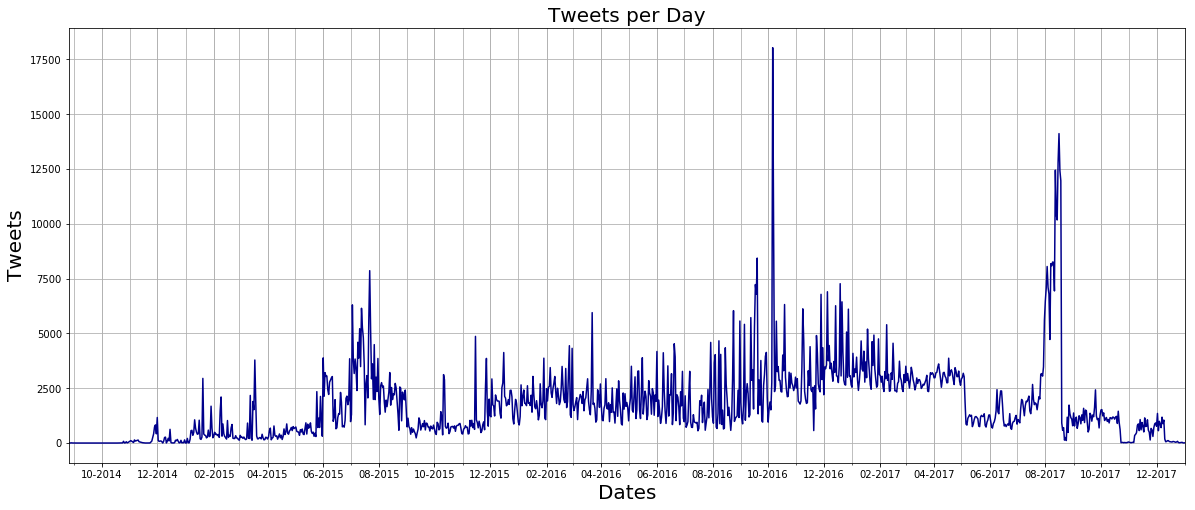

In [814]:
from matplotlib import dates as mdates
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(111)

plt.plot(dates1, color = 'darkblue' )
plt.ylabel('Tweets', fontsize=20)
plt.xlabel('Dates', fontsize=20)
plt.title('Tweets per Day', fontsize=20)


months = mdates.MonthLocator()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_minor_locator(months)
ax.grid(which='both')  
plt.xlim([datetime.date(2014, 8, 26), datetime.date(2018, 1, 1)])

plt.show()

Looking at this graph, a few things stand out. First, we can see that these Russian accounts began tweeting around December, 2014. The next piece of information that pops out is that there were 3 spikes in activity around mid to late July 2015, early October 2016, and mid August 2017. The largest spike occured in October of 2016. 


Based on the hashtags used by the  'LeftTroll' and ‘RightTroll’  accounts, I would guess that during these time periods, some event or events occurred related to Donald Trump or Black Lives Matters. Given that Black Lives Matters has been active since 2013 and that Donald Trump announced he was running for president in 2015, a ton of events have occurred involving those topics in this timeframe. Let’s try to match up some MAJOR events that took place during these periods and see if those line up with the 3 spikes. 

First Spike:
June 16, 2015 - Trump Announces he’s running for President - There is a spike in activity for the two months following the announcement. 


Largest Spike:
July 19, 2016 - Trump Wins Republican Primary - We see a flurry of activity before then a slump into the July 19, 2016. Followed by an uptick in activity following July 19th.

October 6, 2016 - Wikileaks releases batch of hacked Hillary Clinton Emails - Largest spike in activity occurs

October 7, 2016 - Washington Post released access Hollywood Tape -  Largest spike in activity occurs

November 8, 2016 - Election Day. There is a major spike right before the election in October. Activity is still high in early November. 


Second Largest Spike:
August 11-12,  2017 - Charlottesville riots. Trump at a press conference at Trump Tower says “there is blame on both sides” about Charlottesville violence, provoking widespread condemnation - Second highest spike in tweets recorded during the week. 


Based on my research, I believe that the 3 spikes in Russian Troll Twitter activity are directly related to 1. Trump announcing he would be running for President, 2. Wikileaks Hillary Email Dump and the release of the Access Hollywood Tape, and 3. Charlottesville and the President's press conference on Charlottesville. 


# Further Research

While my analysis has helped describe and answer a number of questions about the dataset, my work has only scratched the surface of what knowledge this dataset has to offer.  I would suggest that a more rigorous examination of the ‘LeftTroll’ data be conducted. While I was able to uncover general themes in the content of both the ‘LeftTroll’ and ‘RightTroll’ tweets based on the hashtags, I was unable to compare ‘LeftTroll’ tweet occurrences to a dataset on police shootings. I would be interested to see if there is a correlation between number of ‘LeftTroll’ tweets and news reports of police shootings, police brutality, and other racially charged events. I would also suggest exploring the data of the “HashTag Gamer” accounts, to see the methods that these accounts utilized to draw Twitter users to tweets from other Russian Twitter accounts and how these accounts were used to make certain hashtags go viral. I think a good starting point for this would be the methods I used to analyze the hashtags used by the  ‘LeftTroll’ and ‘RightTroll’ accounts. 
